In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os
import re
import warnings
warnings.simplefilter('ignore')

In [6]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size','fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
data=pd.read_csv('Cars.csv',names=cols)
data = data.drop(labels=0, axis=0)


In [7]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
data.shape

(205, 26)

In [9]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


The '?' marks indicate the null values and needs to be replaced by 'NaN'. 

In [10]:
data=data.replace('?',np.NaN)

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data=data.replace("?",np.NaN)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


Check the count of the null values in each columns of the dataset.

In [13]:
data.dtypes

symboling            object
normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
dtype: object

In [14]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
avg_norm_loss = data['normalized-losses'].astype("float").mean()
avg_norm_loss

122.0

In [16]:
data["normalized-losses"].replace(np.NaN, avg_norm_loss, inplace = True)
data["normalized-losses"]

1      122.0
2      122.0
3      122.0
4        164
5        164
       ...  
201       95
202       95
203       95
204       95
205       95
Name: normalized-losses, Length: 205, dtype: object

In [17]:
avg_bore = data['bore'].astype("float").mean()
avg_bore

3.3297512437810957

In [18]:
data["bore"].replace(np.NaN, avg_norm_loss, inplace = True)
data["bore"]

1      3.47
2      3.47
3      2.68
4      3.19
5      3.19
       ... 
201    3.78
202    3.78
203    3.58
204    3.01
205    3.78
Name: bore, Length: 205, dtype: object

In [21]:
avg_stroke = data['stroke'].astype("float").mean()
print(avg_stroke)
data["stroke"].replace(np.NaN, avg_norm_loss, inplace = True)
data["stroke"]

5.572390243902446


1      2.68
2      2.68
3      3.47
4      3.40
5      3.40
       ... 
201    3.15
202    3.15
203    2.87
204    3.40
205    3.15
Name: stroke, Length: 205, dtype: object

In [23]:
avg_hpower=data['horsepower'].astype('float').mean()
print(avg_hpower)
data['horsepower'].replace(np.NaN,avg_hpower,inplace=True)
data['horsepower']

104.25615763546799


1      111
2      111
3      154
4      102
5      115
      ... 
201    114
202    160
203    134
204    106
205    114
Name: horsepower, Length: 205, dtype: object

In [24]:
avg_peakrpm= data['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


In [25]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [27]:
#replace the missing 'num-of-doors' values by the most frequent 
data["num-of-doors"].replace(np.nan, "four", inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [28]:
data.dtypes

symboling            object
normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
dtype: object

Changing the dtypes of the columns inot required types, which may further affect the analysis

In [38]:
data[["bore", "stroke","price","peak-rpm","wheel-base","length","width","height","compression-ratio"]] = data[["bore", "stroke","price","peak-rpm","wheel-base","length","width","height","compression-ratio"]].astype("float")
data[["normalized-losses","symboling","city-mpg","engine-size","curb-weight","highway-mpg"]] = data[["normalized-losses","symboling","engine-size","city-mpg","curb-weight","highway-mpg"]].astype(np.int64)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [39]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

Transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km". </div>
The formula for unit conversion is

L/100km = 235 / mpg

In [40]:
data['highway-mpg']=235/data['highway-mpg']

data.rename(columns={'highway-mpg':'highway-L/100km'},inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0


#### Data Normalisation

In [41]:
data['width']=data['width']/data['width'].max()
data['length']=data['length']/data['length'].max()
data['height']=data['height']/data['height'].max()
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0


In [45]:
data['horsepower']=data['horsepower'].astype(np.int64)

In [47]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0


Text(0.5, 1.0, 'horsepower bins')

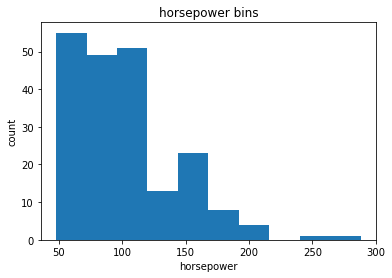

In [49]:
plt.hist(data['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

In [63]:
bins=np.linspace(min(data['horsepower']),max(data['horsepower']),4)

In [64]:
group_names=['Low','Medium','High']

In [65]:
data['horsepower-binned']=pd.cut(data['horsepower'],bins,labels=group_names,include_lowest=True)
data[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
1,111,Low
2,111,Low
3,154,Medium
4,102,Low
5,115,Low


In [68]:
data['horsepower-binned'].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower bins')

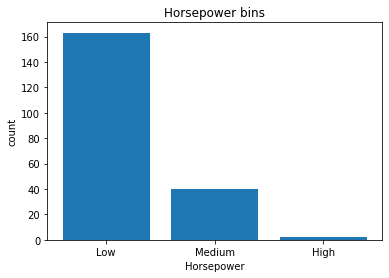

In [75]:
plt.bar(group_names,data['horsepower-binned'].value_counts())
plt.xlabel('Horsepower')
plt.ylabel('count')
plt.title('Horsepower bins')

In [84]:
data[data['fuel-type']=='disel']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,horsepower-binned


In [86]:
dummy1=pd.get_dummies(data["fuel-type"])
dummy1.head()

,diesel,gas
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


In [87]:
dummy1.rename(columns={'fuel-type-diesel':'gas','fuel-type-diesel':'diesel'},inplace=True)
dummy1

,diesel,gas
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
201,0,1
202,0,1
203,0,1
204,1,0


In [88]:
data=pd.concat([data,dummy1],axis=1)
data.drop('fuel-type',axis=1,inplace=True)

In [89]:
dummy2=pd.get_dummies(data['aspiration'])
dummy2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy2.head()

,aspiration-std,aspiration-turbo
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [90]:
data=pd.concat([data,dummy2],axis=1)
data.drop('aspiration',axis=1,inplace=True)

In [91]:
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,111,5000.0,21,8.703704,13495.0,Low,0,1,1,0
2,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,111,5000.0,21,8.703704,16500.0,Low,0,1,1,0
3,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,154,5000.0,19,9.038462,16500.0,Medium,0,1,1,0
4,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,102,5500.0,24,7.833333,13950.0,Low,0,1,1,0
5,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,115,5500.0,18,10.681818,17450.0,Low,0,1,1,0


In [92]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,diesel,gas,aspiration-std,aspiration-turbo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,5.645268,5.572390,10.142537,104.253659,5125.369458,25.219512,8.034347,13207.129353,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,16.456470,16.467534,3.972040,39.519219,476.979093,6.542142,1.849782,7947.066342,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.600000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,122.000000,122.000000,23.000000,288.000000,6600.000000,49.000000,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
data.to_csv('dataready.csv')